<a href="https://colab.research.google.com/github/AugustoBonifacio001/AugustoBonifacio001/blob/main/teste_reconstrucao_de_sinais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-12-e66b03629308>:27: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t[:num_amostras], x_amostrado, label='Sinal amostrado', basefmt =" ", use_line_collection=True)


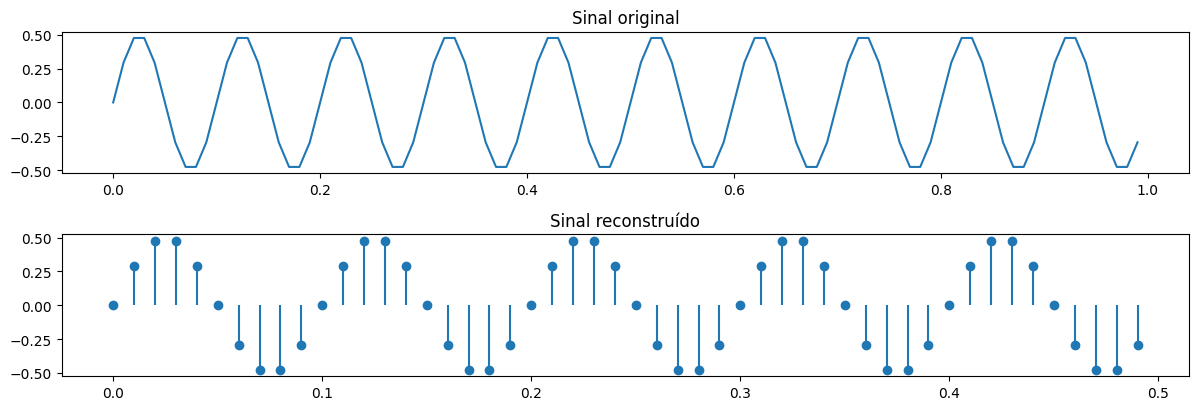

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

f1= 5
f2 =10
fs =100  #frequência de amostragem
t = np.arange(0,1, 1/fs) #tempo de 0 até 1 segundos com taxa de amostragem de fs

x = np.sin(2*np.pi*f1) + 0.5*np.sin(2*np.pi*f2*t)

#amostragem

num_amostras = 50
x_amostrado = x[:num_amostras]
X_amostrado = fft(x_amostrado)
x_reconstruido = ifft(X_amostrado)

plt.figure(figsize=(12,6))

plt.subplot(3,1,1)
plt.subplot(3,1,1)
plt.plot(t, x, label='Sinal Original')
plt.title('Sinal original')

plt.subplot(3,1,2)
plt.stem(t[:num_amostras], x_amostrado, label='Sinal amostrado', basefmt =" ", use_line_collection=True)
plt.title('Sinal reconstruído')

plt.tight_layout()
plt.show()
